In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
directory = 'ds004504'

In [28]:
cls = ['participant_id', 'Gender', 'Age', 'Group', 'MMSE']
participants_df = pd.read_csv(f'{directory}/participants.tsv', sep='\t', usecols=cls)
participants_df.drop(0)
print(participants_df)


   participant_id Gender  Age Group  MMSE
0         sub-001      F   57     A    16
1         sub-002      F   78     A    22
2         sub-003      M   70     A    14
3         sub-004      F   67     A    20
4         sub-005      M   70     A    22
..            ...    ...  ...   ...   ...
83        sub-084      F   71     F    24
84        sub-085      M   64     F    26
85        sub-086      M   49     F    26
86        sub-087      M   73     F    24
87        sub-088      M   55     F    24

[88 rows x 5 columns]


In [82]:
male_df = participants_df[participants_df['Gender'] == 'M']
female_df = participants_df[participants_df['Gender'] == 'F']
Gender_dfs = [male_df, female_df]
print(len(male_df))
print(len(female_df))
    #"A": "Alzheimer Disease Group",
    #"F": "Frontotemporal Dementia Group",
    #"C": "Healthy Group"
Group_A_df = participants_df[participants_df['Group'] == 'A']
Group_F_df = participants_df[participants_df['Group'] == 'F']
Group_C_df = participants_df[participants_df['Group'] == 'C']
Group_dfs = [Group_A_df, Group_F_df, Group_C_df]
print(len(Group_A_df))
print(len(Group_F_df))
print(len(Group_C_df))
Ages_Lower_59_df = participants_df[participants_df['Age'] < 59]
Ages_60_69_df = participants_df[(participants_df['Age'] > 59) & (participants_df['Age'] < 70)]
Ages_Higher_70_df = participants_df[participants_df['Age'] > 70]
Age_dfs = [Ages_Lower_59_df, Ages_60_69_df, Ages_Higher_70_df]


44
44
36
23
29


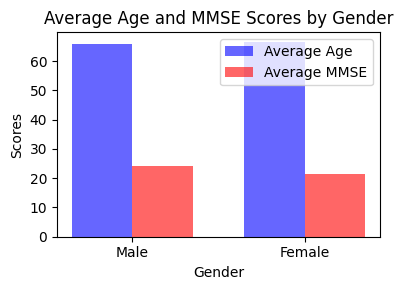

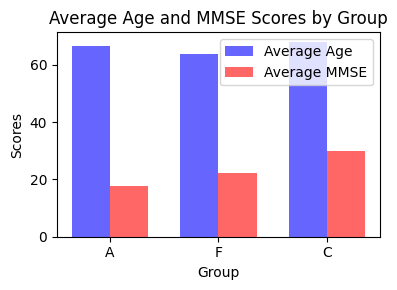

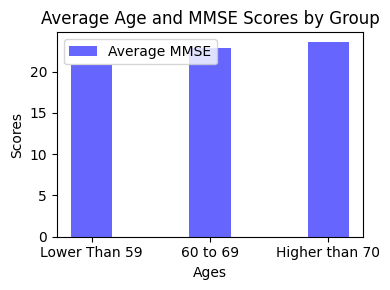

In [80]:
# Basic stats of each df:

g = ['Male', 'Female']
group = ['A', 'F', 'C']
Ages = ['Lower Than 59', '60 to 69', 'Higher than 70']
average_ages = []
average_mmses = []
for i, df in enumerate(Gender_dfs):

    average_age = round(df['Age'].mean(), 3)
    average_ages.append(average_age)
    average_mmse = round(df['MMSE'].mean(), 3)
    average_mmses.append(average_mmse)

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.35
index = range(len(g))
bar1 = ax.bar(index, average_ages, bar_width, label='Average Age', color='b', alpha=0.6)
bar2 = ax.bar([p + bar_width for p in index], average_mmses, bar_width, label='Average MMSE', color='r', alpha=0.6)
ax.set_xlabel('Gender')
ax.set_ylabel('Scores')
ax.set_title('Average Age and MMSE Scores by Gender')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(g, rotation=0)
ax.legend()
plt.tight_layout()
plt.show()

average_ages = []
average_mmses = []
for i, df in enumerate(Group_dfs):
    average_age = round(df['Age'].mean(), 3)
    average_ages.append(average_age)
    average_mmse = round(df['MMSE'].mean(), 3)
    average_mmses.append(average_mmse)

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.35
index = range(len(group))
bar1 = ax.bar(index, average_ages, bar_width, label='Average Age', color='b', alpha=0.6)
bar2 = ax.bar([p + bar_width for p in index], average_mmses, bar_width, label='Average MMSE', color='r', alpha=0.6)
ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Average Age and MMSE Scores by Group')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(group)
ax.legend()
plt.tight_layout()
plt.show()

average_ages = []
average_mmses = []
for i, df in enumerate(Age_dfs):
    average_mmse = round(df['MMSE'].mean(), 3)
    average_mmses.append(average_mmse)
    std = round(df['Age'].std(),3)

fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.35
index = range(len(group))
bar1 = ax.bar(index, average_mmses, bar_width, label='Average MMSE', color='b', alpha=0.6)
ax.set_xlabel('Ages')
ax.set_ylabel('Scores')
ax.set_title('Average Age and MMSE Scores by Group')
ax.set_xticks([p + bar_width / 200 for p in index])
ax.set_xticklabels(Ages)
ax.legend()
plt.tight_layout()
plt.show()